# 1-DATA

7. Attribute Information: (classes: edible=e, poisonous=p)
-     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
-     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
-     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
-     4. bruises?:                 bruises=t,no=f
-     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
-     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
-     7. gill-spacing:             close=c,crowded=w,distant=d
-     8. gill-size:                broad=b,narrow=n
-     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
-    10. stalk-shape:              enlarging=e,tapering=t
-    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
-    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
-    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
-    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
-    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
-    16. veil-type:                partial=p,universal=u
-    17. veil-color:               brown=n,orange=o,white=w,yellow=y
-    18. ring-number:              none=n,one=o,two=t
-    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
-    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
-    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
-    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d
------------------------------------------------------------------------------------                                  
-    23.poisonous: edible=e,poisonous=p TARGET VARIABLE

!pip install lightgbm
!pip install xgboost
!pip install catboost

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Feature Engineering, Feature Selection
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder


#Model Evaluation
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score, classification_report

#Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model  import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn import neighbors
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline

In [92]:
pd.set_option('display.max_columns', None)

In [93]:
df_columns= ['poisonous','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color',
            'stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring',
             'stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population',
            'habitat']

In [94]:
df = pd.read_csv('agaricus-lepiota.data',sep=',',names=df_columns)


In [95]:
df

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [96]:
df.shape

(8124, 23)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

##### All variables seems categorical. Some variables like gill size,ring number etc. what seems like numerical are categorical too. They represent range of variable

#### 1.1 Missing Values

In [98]:
df.isnull().sum()

poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### It seems we don't have any missing values but we have. Missing values in the data replaced with '?' character . So we need to look every variable.

#### 1.2 Duplicated Values



In [99]:
# We don't have any unique identifier variables. So only looking for duplicated row is enough
df.duplicated().sum()

0

#### 1.3 Train Test Split

We should do train-test split before EDA because we want to prevent bias

In [100]:
X= df.drop('poisonous',axis=1)
y= pd.DataFrame(df['poisonous'])

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=34)

In [102]:
X_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2842,x,y,n,t,n,f,c,b,p,t,b,s,s,g,g,p,w,o,p,n,y,d
4182,x,y,y,f,f,f,c,b,g,e,b,k,k,p,n,p,w,o,l,h,y,d
7914,k,s,e,f,f,f,c,n,b,t,?,k,k,p,p,p,w,o,e,w,v,d
4743,x,f,y,f,f,f,c,b,g,e,b,k,k,b,p,p,w,o,l,h,v,d
237,b,y,y,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,f,y,g,t,n,f,c,b,n,t,b,s,s,p,w,p,w,o,p,n,y,d
5993,f,y,y,f,f,f,c,b,g,e,b,k,k,b,p,p,w,o,l,h,v,g
2538,x,f,e,t,n,f,c,b,n,t,b,s,s,w,g,p,w,o,p,k,v,d
5242,f,y,y,f,f,f,c,b,g,e,b,k,k,p,p,p,w,o,l,h,v,d


In [103]:
X_test

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
963,x,f,n,t,n,f,c,b,n,t,b,s,s,p,g,p,w,o,p,n,y,d
6805,f,y,e,f,f,f,c,n,b,t,?,s,s,w,p,p,w,o,e,w,v,l
4390,x,y,y,f,f,f,c,b,g,e,b,k,k,p,n,p,w,o,l,h,y,g
502,x,s,w,t,l,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
2545,x,y,g,t,n,f,c,b,n,t,b,s,s,w,g,p,w,o,p,n,v,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5168,x,f,n,f,n,f,c,n,w,e,?,k,y,w,n,p,w,o,e,w,v,d
1980,f,f,w,f,n,f,w,b,p,t,e,s,s,w,w,p,w,o,e,n,s,g
4831,k,y,e,t,n,f,c,b,e,e,?,s,s,w,w,p,w,t,e,w,c,w
725,x,y,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,n,v,g


# 2-EDA

#### 2.1 Feature Distribution

In [104]:
def feature_distr(df):
    for feature in df.columns:
        if df[feature].dtype=='O':
            sns.countplot(x=feature, data=df)
        elif df[feature].dtype in ['int_', 'int8', 'int16', 'int32', 'int64', 'uint8', 'uint16',
                                   'uint32', 'uint64','float_', 'float16', 'float32','float64']:
            sns.displot(df[feature].dropna(), bins=40)
        plt.show()

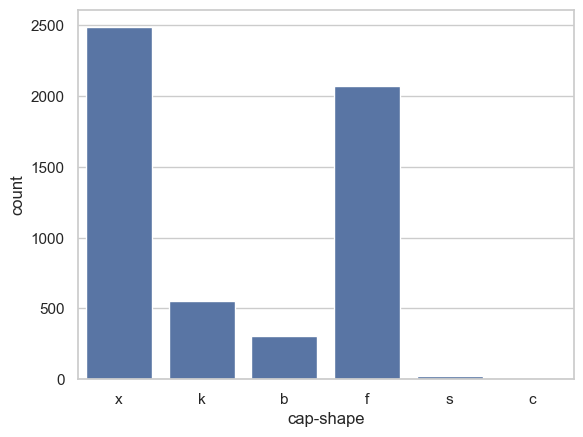

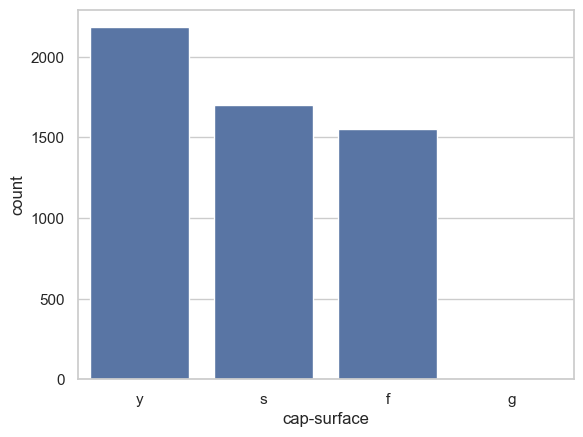

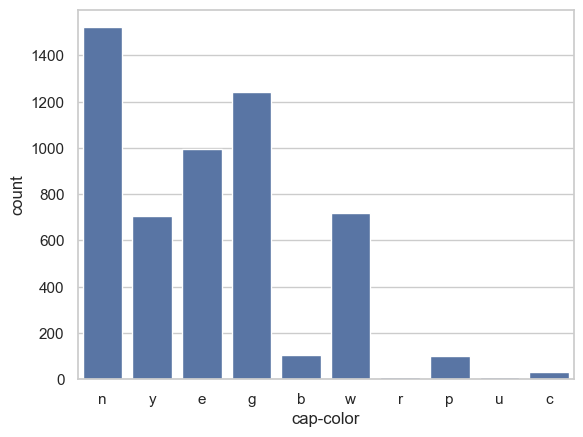

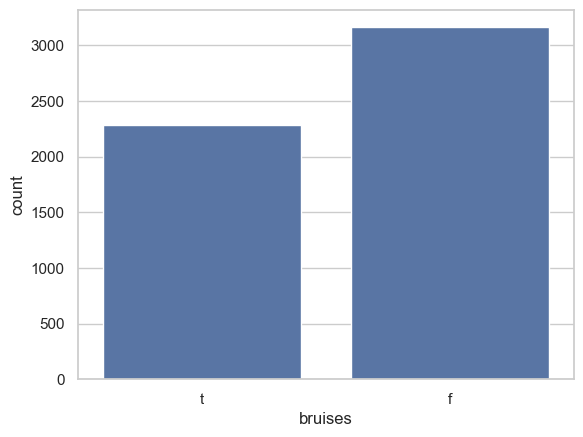

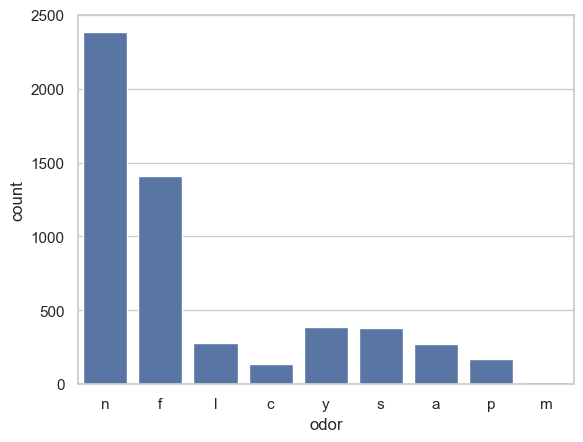

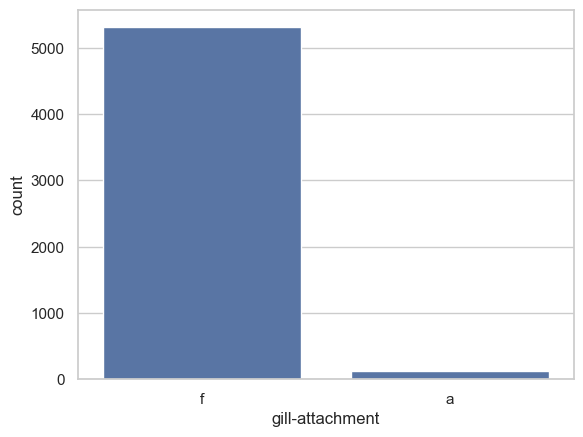

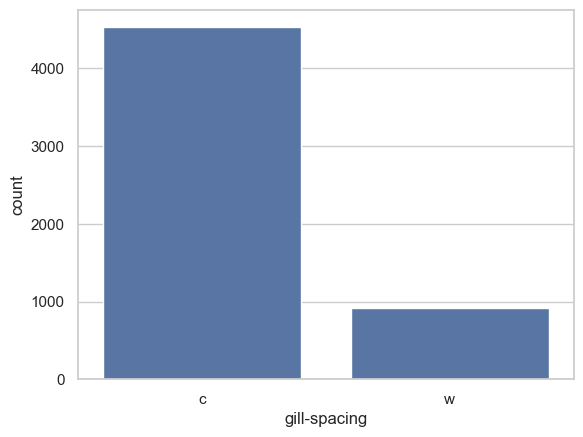

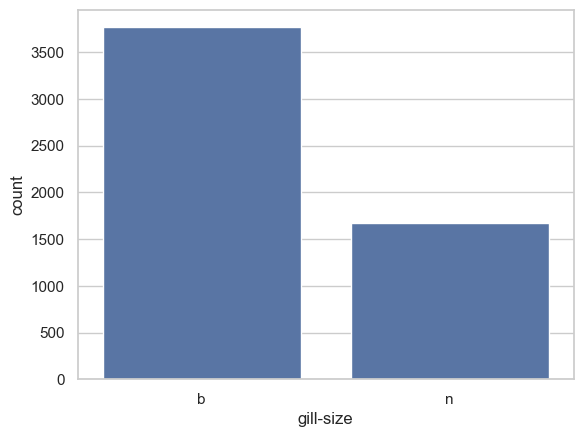

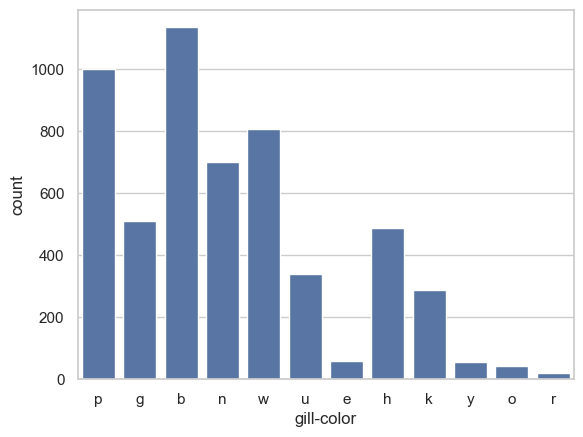

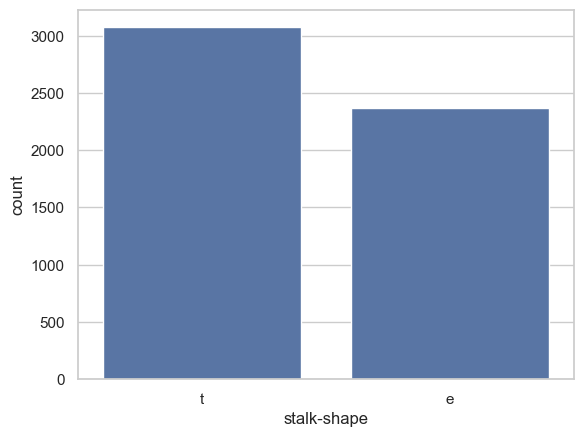

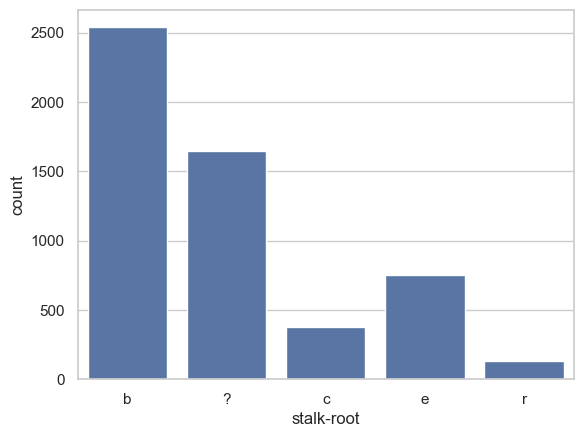

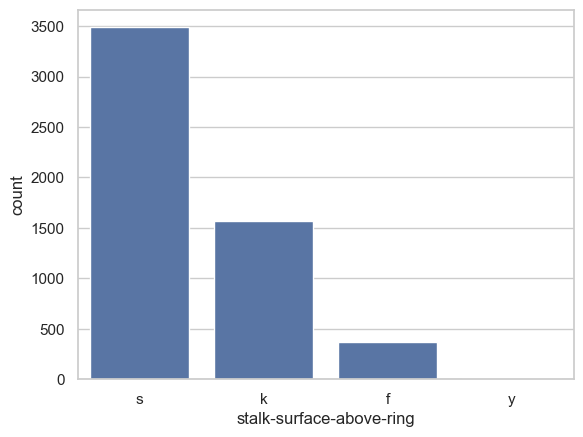

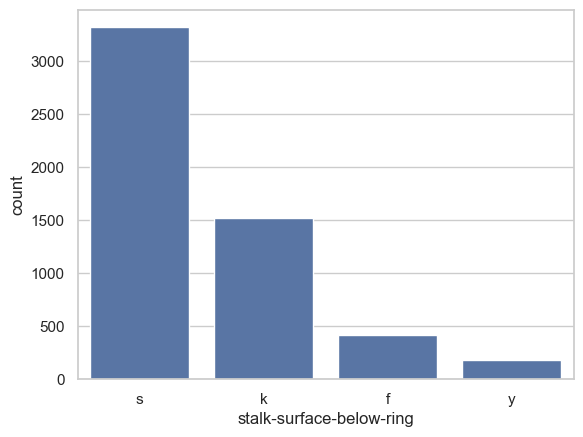

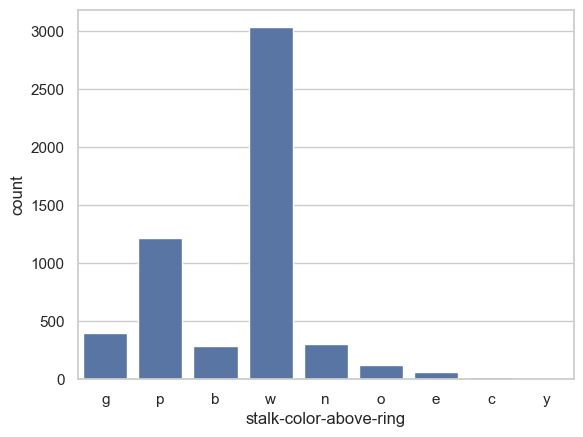

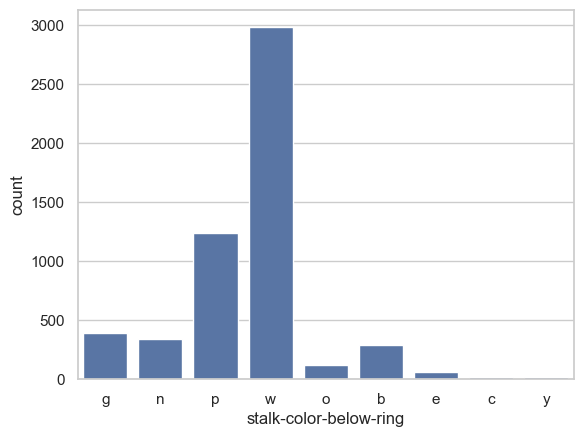

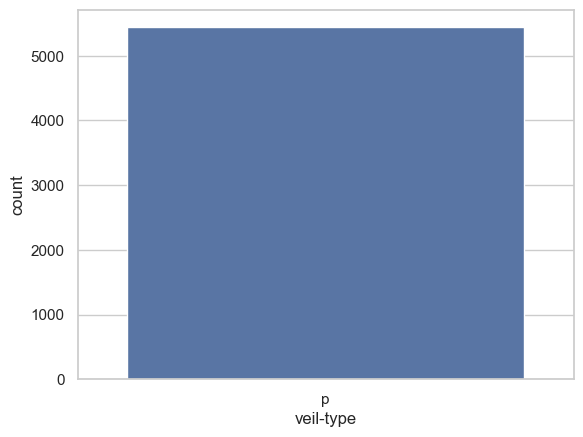

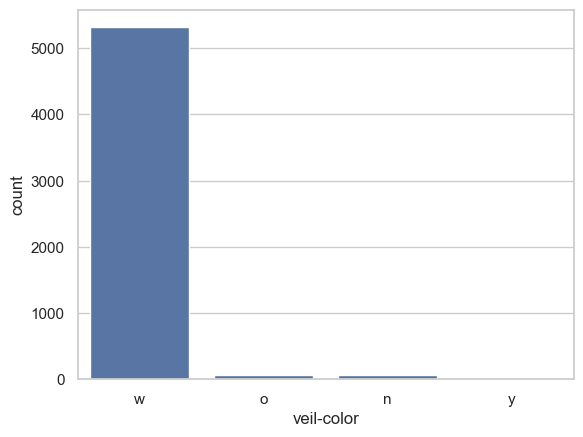

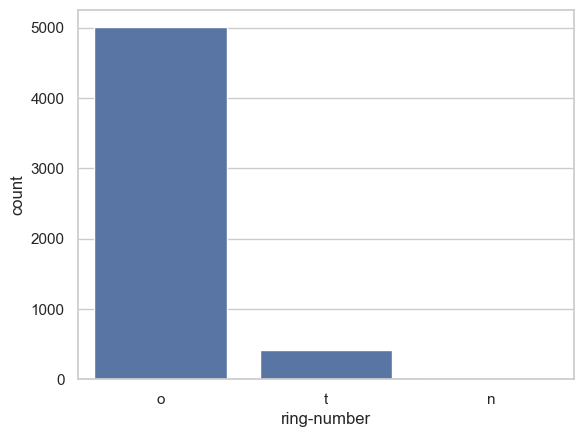

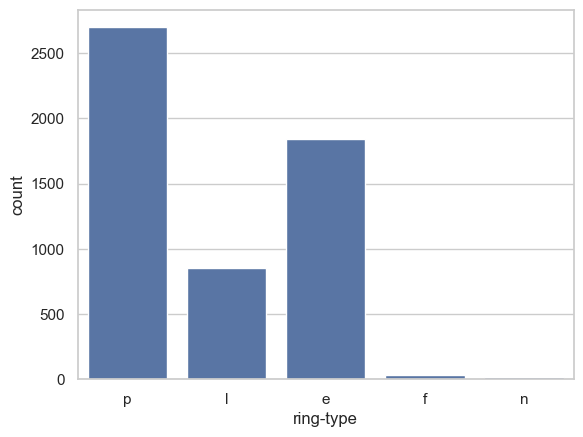

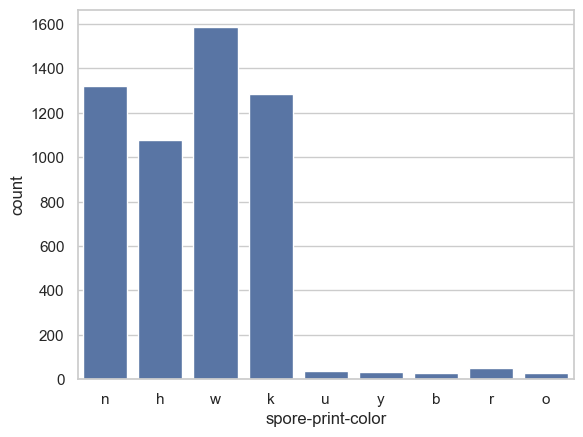

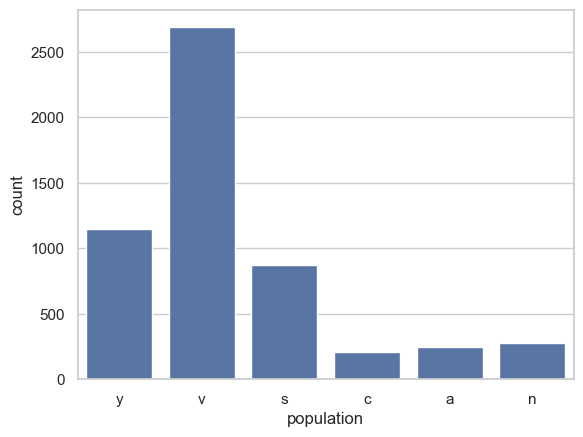

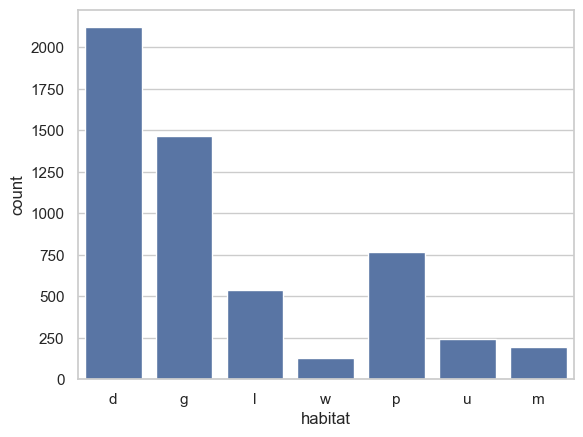

In [105]:
feature_distr(X_train)

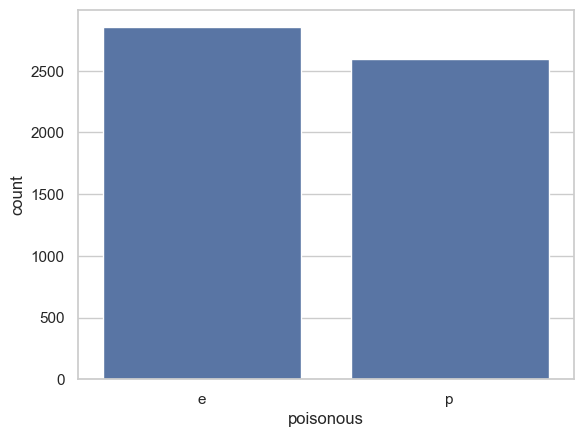

In [106]:
feature_distr(y_train)

In [107]:
train_set = pd.concat([X_train,y_train],axis=1)

Observations:
- gill-attachments, 
- gill-spacing, 
- ring-number, 
- veil-color,
 
are imbalanced variables. So we should transform or drop them, 

- Also we have constant variable 'veil-type'. We can drop it


#### 2.2 How many NUMERICAL variable are there?

In [108]:
numerical_variables = [feature for feature in X_train.columns if X_train[feature].dtype in ['int_', 'int8', 'int16', 'int32', 'int64', 'uint8', 'uint16',
                               'uint32', 'uint64','float_', 'float16', 'float32','float64']]
print('Number of numerical variables =>',len(numerical_variables),'\nNumerical Variables=>',numerical_variables)

Number of numerical variables => 0 
Numerical Variables=> []


######  -----------2.2.1 How many CONTINUOUS variable are there ?

In [109]:
continuous_variables =[feature for feature in numerical_variables if len(X_train[feature].unique()) > 25] 
print('Number of continuous variables =>',len(continuous_variables),'\nContinuous Variables=>',continuous_variables)

Number of continuous variables => 0 
Continuous Variables=> []


######  -----------2.2.2 How many DISCRETE variable are there ?

In [110]:
discrete_variables =[feature for feature in numerical_variables if len(X_train[feature].unique()) < 25] 
print('Number of discrete variables =>',len(discrete_variables),'\nDiscrete Variables=>',discrete_variables)

Number of discrete variables => 0 
Discrete Variables=> []


#### 2.3 How many CATEGORICAL variable are there?

In [111]:
categorical_variables = [feature for feature in X_train.columns if X_train[feature].dtype in ['O','bool_']]
print('Number of categorical variables =>',len(categorical_variables),'\nCategorical Variables=>',categorical_variables)

Number of categorical variables => 22 
Categorical Variables=> ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


 We should determine ORDINAL and NOMINAL CATEGORICAL variables

######  -----------2.3.1 How many NOMINAL variable are there ?

In [112]:
# We identify nominal and ordinal variables by analysing the unique 
# values of each variable.
nominal_variables = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
                     'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                     'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
                     'veil-color', 'ring-type', 'spore-print-color', 'population', 'habitat']
#Target variable 'Poisonous' is nominal too

In [113]:
# Number of categories in nominal variables
total = 0
for feature in nominal_variables:
    print(feature,'=>',len(X_train[feature].unique()))
    total += len(X_train[feature].unique())
print('Total nominal category:',total)

cap-shape => 6
cap-surface => 4
cap-color => 10
bruises => 2
odor => 9
gill-attachment => 2
gill-spacing => 2
gill-size => 2
gill-color => 12
stalk-shape => 2
stalk-root => 5
stalk-surface-above-ring => 4
stalk-surface-below-ring => 4
stalk-color-above-ring => 9
stalk-color-below-ring => 9
veil-type => 1
veil-color => 4
ring-type => 5
spore-print-color => 9
population => 6
habitat => 7
Total nominal category: 114


######  -----------2.3.2 How many ORDINAL variable are there ?

In [114]:
# Sometimes discrete variables are 
#maybe population can take as a ordinal but i couldn't find rank of 'clustered' category 
ordinal_variables = ['ring-number']

In [115]:
total = 0
for feature in ordinal_variables:
    print(len(df[feature].unique()))
    total += len(df[feature].unique())
print('Total ordinal category:',total)

3
Total ordinal category: 3


##### 2.4 Outliers Detection

There are only categorical features. So, Maybe we can drop some of categories of nominal variables according to percentage of value counts (In Converting categorical to numeric step) 

# 3-Handling Missing Values

We have missing values in stalk-root features only and there are so many missing values in there. Let's look numbers

In [116]:
df['stalk-root'].value_counts()

stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64

Missing values are second highest count. So, instead of imputing them, let's use them as a new category

# 4-Handling Imbalanced Dataset

In [117]:
df['poisonous'].value_counts()

poisonous
e    4208
p    3916
Name: count, dtype: int64

In [118]:
balance = pd.DataFrame(df['poisonous'].value_counts().values, columns=['poisonous'], index=['e','p'])
balance

,poisonous
e,4208
p,3916


In [119]:
balance['ratio'] = balance['poisonous']/balance['poisonous'].sum()
balance

,poisonous,ratio
e,4208,0.517971
p,3916,0.482029


Our dataset is balanced. So we don't have a problem here

# 5- Scaling

We dont have numerical features. So we dont need standardization

# 6- Category Encoding

We specified nominal and ordinal categories. Now, we can encode them

#### 6.1 Ordinal Category Encoding

we have only one ordinal feature. 
- ring-number

In [120]:
X_train[ordinal_variables[0]].unique()

array(['o', 't', 'n'], dtype=object)

n=> None , o => one , t => two ===> So we can order them as 0,1,2


In [121]:
X_train['ring-number'] = X_train['ring-number'].map({'n':0,'o':1,'t':2})

In [122]:
X_train['ring-number'].value_counts()

ring-number
1    5005
2     420
0      18
Name: count, dtype: int64

In [123]:
X_test['ring-number'] = X_test['ring-number'].map({'n':0,'o':1,'t':2})

In [124]:
X_test['ring-number'].value_counts()

ring-number
1    2483
2     180
0      18
Name: count, dtype: int64

<Axes: xlabel='ring-number', ylabel='count'>

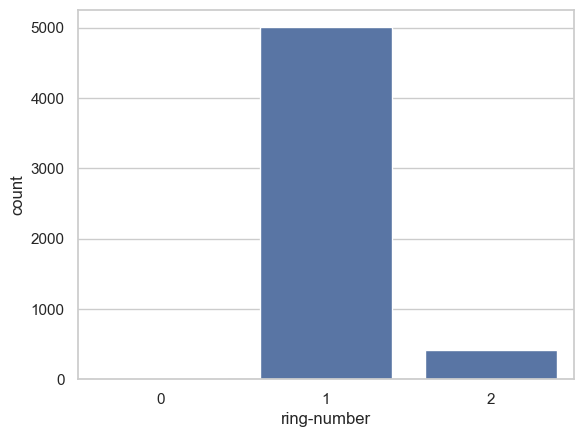

In [125]:
sns.countplot(x=X_train['ring-number'])

##### 6.2 Nominal Category Encoding

We have 116 category in nominal features. If we use one hot encoding this can cause curse of dimensionality problem. So i optimizied one hot encoding technique. In every feature we took categories that represents %90 of feature.

#### 6.2 Alternative One Hot Encoding

In [126]:
def alternative_ohe(df,percentage,variables):
    ''' 
    One hot encoding with percentage of value counts.
    
    df: DataFrame what we wanted to apply OHE
    
    variables: Features that we wanted to encode. Function takes it because maybe we want to encode only nominals
    
    percentage : Percentage of feature what we wanted to use
    '''
    df_ohe = df.copy()
    for feature in variables:     
        #creating dataframe for every feature and determining Value_counts and value ratio (value_counts/total count)
        dicto = {feature:df_ohe[feature].value_counts(ascending=False).index,
                 'Value_counts':df_ohe[feature].value_counts(ascending=False).values}
        df_fe = pd.DataFrame(data=dicto)
        df_fe['Value_Ratio'] = df_fe['Value_counts']/df_ohe.shape[0]
        
        total_perc=0.0
        
        #analysing all categories of variables
        for i in range (0,len(df_fe)):
            # %90 of data is covered. we can change it
            if (total_perc < (percentage/100)) : 
                total_perc += df_fe.iloc[i:i+1]['Value_Ratio'].values[0]
                #print(total_perc)            
            else:
                df_fe= df_fe.iloc[0:i]                
                break
        # if all category taken, we drop one of them. Because we try to escape curse of dimensionality       
        if (total_perc == 1.0):                
                df_fe.drop(index=len(df_fe)-1,inplace=True)
        #print(df_fe)
        for category in df_fe[feature].values:
            #print(category)            
            df_ohe[feature+'_'+category]= np.where(df_ohe[feature]==category,1,0)
    df_ohe.drop(variables,axis=1,inplace=True)
    return df_ohe

In [127]:
# Because of my OHE technique , test and train sets' categories are choosing different. For solve it,
# i chose train features and use it for test set too
X_train_ohe = alternative_ohe(X_train,90,nominal_variables)
y_train_ohe = alternative_ohe(y_train,90,y_train.columns)
X_test_ohe = pd.get_dummies(data=X_test)[X_train_ohe.columns]
y_test_ohe = alternative_ohe(y_test,90,y_test.columns)
X_train_ohe

,ring-number,cap-shape_x,cap-shape_f,cap-shape_k,cap-surface_y,cap-surface_s,cap-surface_f,cap-color_n,cap-color_g,cap-color_e,cap-color_w,cap-color_y,bruises_f,odor_n,odor_f,odor_y,odor_s,odor_l,odor_a,gill-attachment_f,gill-spacing_c,gill-size_b,gill-color_b,gill-color_p,gill-color_w,gill-color_n,gill-color_g,gill-color_h,gill-color_u,stalk-shape_t,stalk-root_b,stalk-root_?,stalk-root_e,stalk-surface-above-ring_s,stalk-surface-above-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_k,stalk-surface-below-ring_f,stalk-color-above-ring_w,stalk-color-above-ring_p,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-below-ring_w,stalk-color-below-ring_p,stalk-color-below-ring_g,stalk-color-below-ring_n,veil-color_w,ring-type_p,ring-type_e,ring-type_l,spore-print-color_w,spore-print-color_n,spore-print-color_k,spore-print-color_h,population_v,population_y,population_s,population_n,habitat_d,habitat_g,habitat_p,habitat_l,habitat_u
2842,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
4182,1,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0
7914,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4743,1,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
237,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
5993,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
2538,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
5242,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0


In [128]:
X_test_ohe[X_train_ohe.columns]

,ring-number,cap-shape_x,cap-shape_f,cap-shape_k,cap-surface_y,cap-surface_s,cap-surface_f,cap-color_n,cap-color_g,cap-color_e,cap-color_w,cap-color_y,bruises_f,odor_n,odor_f,odor_y,odor_s,odor_l,odor_a,gill-attachment_f,gill-spacing_c,gill-size_b,gill-color_b,gill-color_p,gill-color_w,gill-color_n,gill-color_g,gill-color_h,gill-color_u,stalk-shape_t,stalk-root_b,stalk-root_?,stalk-root_e,stalk-surface-above-ring_s,stalk-surface-above-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_k,stalk-surface-below-ring_f,stalk-color-above-ring_w,stalk-color-above-ring_p,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-below-ring_w,stalk-color-below-ring_p,stalk-color-below-ring_g,stalk-color-below-ring_n,veil-color_w,ring-type_p,ring-type_e,ring-type_l,spore-print-color_w,spore-print-color_n,spore-print-color_k,spore-print-color_h,population_v,population_y,population_s,population_n,habitat_d,habitat_g,habitat_p,habitat_l,habitat_u
963,1,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False,False,True,False,False,False,True,True,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,True,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False
6805,1,False,True,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,True,False,True,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False
4390,1,True,False,False,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,True,True,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False
502,1,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
2545,1,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False,False,True,False,False,False,True,True,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,True,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5168,1,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,True,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False
1980,1,False,True,False,False,False,True,False,False,False,True,False,True,True,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,True,True,False,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False
4831,2,False,False,True,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,True,False,False,Fals

In [129]:
print('Number of columns before OHE=>',len(X_train.columns),'\nNumber of columns after OHE=>',len(X_train_ohe.columns),'\nColumn count change=>',(len(X_train_ohe.columns)-len(X_train.columns)))

Number of columns before OHE=> 22 
Number of columns after OHE=> 63 
Column count change=> 41


linear_model = LogisticRegression()
linear_model.fit(X_train_ohe, y_train_ohe)
y_pred = linear_model.predict(X_test_ohe)
print(f"MAE=>{mean_absolute_error(y_test_ohe, y_pred)}\nMSE=>{mean_squared_error(y_test_ohe,y_pred)}\nRMSE=>{np.sqrt(mean_squared_error(y_test_ohe,y_pred))}\nR^2 Score=>{r2_score(y_test_ohe, y_pred)}")

# 7 Feature Importance

In [130]:
X_train_ohe

,ring-number,cap-shape_x,cap-shape_f,cap-shape_k,cap-surface_y,cap-surface_s,cap-surface_f,cap-color_n,cap-color_g,cap-color_e,cap-color_w,cap-color_y,bruises_f,odor_n,odor_f,odor_y,odor_s,odor_l,odor_a,gill-attachment_f,gill-spacing_c,gill-size_b,gill-color_b,gill-color_p,gill-color_w,gill-color_n,gill-color_g,gill-color_h,gill-color_u,stalk-shape_t,stalk-root_b,stalk-root_?,stalk-root_e,stalk-surface-above-ring_s,stalk-surface-above-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_k,stalk-surface-below-ring_f,stalk-color-above-ring_w,stalk-color-above-ring_p,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-below-ring_w,stalk-color-below-ring_p,stalk-color-below-ring_g,stalk-color-below-ring_n,veil-color_w,ring-type_p,ring-type_e,ring-type_l,spore-print-color_w,spore-print-color_n,spore-print-color_k,spore-print-color_h,population_v,population_y,population_s,population_n,habitat_d,habitat_g,habitat_p,habitat_l,habitat_u
2842,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
4182,1,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0
7914,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4743,1,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
237,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
5993,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
2538,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
5242,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0


## 7.1 Mutual Information for OHE

We can reduce column number with checking feature importance.

In [131]:
mi_values = mutual_info_classif(X_train_ohe, y_train_ohe, discrete_features=True)
mi_values

array([2.61235411e-02, 4.45142765e-04, 1.47567444e-04, 1.38314836e-02,
       3.43128346e-03, 5.02329416e-03, 1.91694169e-02, 8.24852848e-04,
       8.98508666e-04, 3.94620437e-03, 9.34290778e-03, 6.13158055e-03,
       1.31463737e-01, 3.61948623e-01, 2.43514876e-01, 5.62409883e-02,
       5.48687180e-02, 3.42573622e-02, 3.36180482e-02, 1.00360523e-02,
       7.04800390e-02, 1.59560975e-01, 1.85503938e-01, 7.24858294e-04,
       2.99086625e-02, 4.61159093e-02, 6.69443347e-03, 1.07467599e-02,
       2.16268191e-02, 5.42417443e-03, 2.58768098e-04, 4.52158072e-02,
       2.05334914e-02, 1.21627578e-01, 1.88617876e-01, 8.66839374e-02,
       1.82750012e-01, 1.17011730e-02, 2.44906144e-02, 2.73432332e-02,
       5.04055270e-02, 3.54491886e-02, 2.34583005e-02, 2.60690786e-02,
       4.84214710e-02, 2.35836687e-02, 1.12795696e-02, 1.51311896e-01,
       2.47664625e-02, 1.33098239e-01, 6.15008528e-02, 9.17842264e-02,
       8.53375864e-02, 1.44190708e-01, 1.05998294e-01, 6.45886987e-03,
      

In [132]:
feature_importance = pd.DataFrame(data=mi_values,index=X_train_ohe.columns, columns=['Feature_Importance']).sort_values(ascending=False,by="Feature_Importance")

In [133]:
feature_importance

,Feature_Importance
odor_n,0.361949
odor_f,0.243515
stalk-surface-above-ring_k,0.188618
gill-color_b,0.185504
stalk-surface-below-ring_k,0.182750
...,...
cap-color_n,0.000825
gill-color_p,0.000725
cap-shape_x,0.000445
stalk-root_b,0.000259


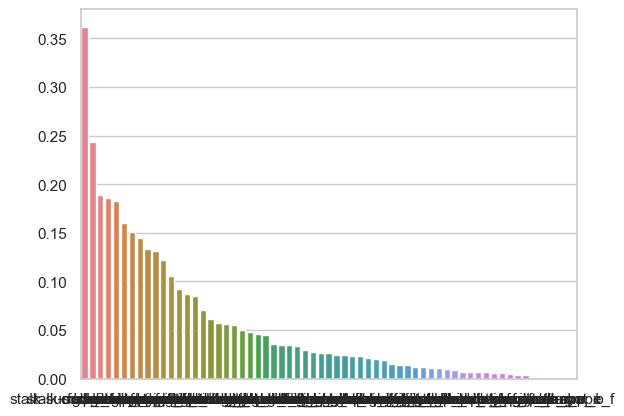

In [134]:
sns.barplot(data=feature_importance.T);

We dropped some of categories in OHE step. So, dropping last six features is enough.

In [135]:
ohe_fi =feature_importance[0:-6].index
ohe_drop = list(feature_importance[-6:].index)

In [136]:
X_train_ohe = X_train_ohe[ohe_fi]
X_test_ohe = X_test_ohe[ohe_fi]
X_train_ohe

,odor_n,odor_f,stalk-surface-above-ring_k,gill-color_b,stalk-surface-below-ring_k,gill-size_b,ring-type_p,spore-print-color_h,ring-type_l,bruises_f,stalk-surface-above-ring_s,population_v,spore-print-color_n,stalk-surface-below-ring_s,spore-print-color_k,gill-spacing_c,spore-print-color_w,habitat_p,odor_y,odor_s,stalk-color-above-ring_g,stalk-color-below-ring_g,gill-color_n,stalk-root_?,stalk-color-above-ring_n,population_n,odor_l,odor_a,gill-color_w,stalk-color-above-ring_p,ring-number,stalk-color-below-ring_p,ring-type_e,stalk-color-above-ring_w,stalk-color-below-ring_n,stalk-color-below-ring_w,gill-color_u,stalk-root_e,cap-surface_f,habitat_g,population_s,cap-shape_k,habitat_l,stalk-surface-below-ring_f,veil-color_w,gill-color_h,gill-attachment_f,cap-color_w,habitat_d,gill-color_g,habitat_u,population_y,cap-color_y,stalk-shape_t,cap-surface_s,cap-color_e,cap-surface_y
2842,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1
4182,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,1,0,0,0,1
7914,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,1,0
4743,0,1,1,0,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0
237,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1
5993,0,1,1,0,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1
2538,1,0,0,0,0,1,1,0,0,0,1,1,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0
5242,0,1,1,0,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,1


In [137]:
X_test_ohe

,odor_n,odor_f,stalk-surface-above-ring_k,gill-color_b,stalk-surface-below-ring_k,gill-size_b,ring-type_p,spore-print-color_h,ring-type_l,bruises_f,stalk-surface-above-ring_s,population_v,spore-print-color_n,stalk-surface-below-ring_s,spore-print-color_k,gill-spacing_c,spore-print-color_w,habitat_p,odor_y,odor_s,stalk-color-above-ring_g,stalk-color-below-ring_g,gill-color_n,stalk-root_?,stalk-color-above-ring_n,population_n,odor_l,odor_a,gill-color_w,stalk-color-above-ring_p,ring-number,stalk-color-below-ring_p,ring-type_e,stalk-color-above-ring_w,stalk-color-below-ring_n,stalk-color-below-ring_w,gill-color_u,stalk-root_e,cap-surface_f,habitat_g,population_s,cap-shape_k,habitat_l,stalk-surface-below-ring_f,veil-color_w,gill-color_h,gill-attachment_f,cap-color_w,habitat_d,gill-color_g,habitat_u,population_y,cap-color_y,stalk-shape_t,cap-surface_s,cap-color_e,cap-surface_y
963,True,False,False,False,False,True,True,False,False,False,True,False,True,True,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,1,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,True,False,False,True,False,True,False,False,False
6805,False,True,False,True,False,False,False,False,False,True,True,True,False,True,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,1,True,True,True,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,True,False,True,True
4390,False,True,True,False,True,True,False,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,1,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,True,True,False,False,False,True
502,False,False,False,False,False,True,True,False,False,False,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,1,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,True,False,True,False,False,False,False,True,False,False
2545,True,False,False,False,False,True,True,False,False,False,True,True,True,True,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,1,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5168,True,False,True,False,False,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,1,False,True,True,True,False,False,False,True,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False
1980,True,False,False,False,False,True,False,False,False,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,False,True,True,False,True,False,True,True,True,True,False,False,False,True,False,True,True,False,False,False,False,False,True,False,False,False
4831,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,2,False,True,True,False,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,True,True
725,False,False,False,False,False,False,True,False,False,False,True,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,False,False,True,False,True,False,True,False,True,False,False,False,False,True,False,True,F

#  8- Model Creation without Cross Validation

In [138]:
models = {    
    'LogisticRegression': LogisticRegression(),    
    'KNeighborsClassifier': KNeighborsClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(learning_rate=0.5, random_state=2),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'LightGBMClassifier': LGBMClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'XGBoost': XGBClassifier(objective='reg:squarederror', random_state=42, learning_rate=0.03, n_estimators=150, max_depth=9),
    'CatBoostRegressor': CatBoostClassifier(metric_period=100)
}

In [139]:
model_names = []
auc_scores = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

for model_name, model_instance in models.items():
    print(f"-----{model_name}-----")
    
    #Fit and Predict
    model_instance.fit(X_train_ohe, y_train_ohe)
    y_pred = model_instance.predict(X_test_ohe)    
    y_pred_prob = model_instance.predict_proba(X_test_ohe)
    
    # Scores 
    auc_score = round(roc_auc_score(y_test_ohe, y_pred_prob[:, 1]), 4)    
    accuracy = round(accuracy_score(y_test_ohe, y_pred),4)
    precision = precision_score(y_test_ohe, y_pred)
    recall = recall_score(y_test_ohe, y_pred)
    f1_sc = f1_score(y_test_ohe, y_pred)

    #Scores append
    model_names.append(model_name)        
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_sc)
    auc_scores.append(auc_score)
    
    #Scores print    
    print("AUC Score:",auc_score)
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print('F1-Score:',f1_sc)
    
    print("\n")

-----LogisticRegression-----
AUC Score: 1.0
Accuracy: 0.9985
Precision: 0.9970588235294118
Recall: 1.0
F1-Score: 0.9985272459499264


-----KNeighborsClassifier-----
AUC Score: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


-----AdaBoostClassifier-----
AUC Score: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


-----GradientBoostingClassifier-----
AUC Score: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


-----LightGBMClassifier-----
[LightGBM] [Info] Number of positive: 2852, number of negative: 2591
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 115
[LightGBM] [Info] Number of data points in the train set: 5443, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523976 -> initscore=0.095977
[LightGBM] [Info] Start t

In [140]:
results = pd.DataFrame({'Model': model_names,'AUC_score': auc_scores, 'Accuracy':accuracies,'Precision':precisions,'Recall':recalls,'F1_Score':f1_scores})

In [141]:
results.sort_values(by='AUC_score', ascending=False)

,Model,AUC_score,Accuracy,Precision,Recall,F1_Score
0,LogisticRegression,1.0,0.9985,0.997059,1.0,0.998527
1,KNeighborsClassifier,1.0,1.0000,1.000000,1.0,1.000000
2,AdaBoostClassifier,1.0,1.0000,1.000000,1.0,1.000000
3,GradientBoostingClassifier,1.0,1.0000,1.000000,1.0,1.000000
4,LightGBMClassifier,1.0,1.0000,1.000000,1.0,1.000000
5,RandomForestClassifier,1.0,1.0000,1.000000,1.0,1.000000
6,XGBoost,1.0,1.0000,1.000000,1.0,1.000000
7,CatBoostRegressor,1.0,1.0000,1.000000,1.0,1.000000


In [142]:
results.sort_values(by='Accuracy', ascending=False)

,Model,AUC_score,Accuracy,Precision,Recall,F1_Score
1,KNeighborsClassifier,1.0,1.0000,1.000000,1.0,1.000000
2,AdaBoostClassifier,1.0,1.0000,1.000000,1.0,1.000000
3,GradientBoostingClassifier,1.0,1.0000,1.000000,1.0,1.000000
4,LightGBMClassifier,1.0,1.0000,1.000000,1.0,1.000000
5,RandomForestClassifier,1.0,1.0000,1.000000,1.0,1.000000
6,XGBoost,1.0,1.0000,1.000000,1.0,1.000000
7,CatBoostRegressor,1.0,1.0000,1.000000,1.0,1.000000
0,LogisticRegression,1.0,0.9985,0.997059,1.0,0.998527


In [143]:
results.sort_values(by='Precision', ascending=False)

,Model,AUC_score,Accuracy,Precision,Recall,F1_Score
1,KNeighborsClassifier,1.0,1.0000,1.000000,1.0,1.000000
2,AdaBoostClassifier,1.0,1.0000,1.000000,1.0,1.000000
3,GradientBoostingClassifier,1.0,1.0000,1.000000,1.0,1.000000
4,LightGBMClassifier,1.0,1.0000,1.000000,1.0,1.000000
5,RandomForestClassifier,1.0,1.0000,1.000000,1.0,1.000000
6,XGBoost,1.0,1.0000,1.000000,1.0,1.000000
7,CatBoostRegressor,1.0,1.0000,1.000000,1.0,1.000000
0,LogisticRegression,1.0,0.9985,0.997059,1.0,0.998527


In [144]:
results.sort_values(by='Recall', ascending=False)

,Model,AUC_score,Accuracy,Precision,Recall,F1_Score
0,LogisticRegression,1.0,0.9985,0.997059,1.0,0.998527
1,KNeighborsClassifier,1.0,1.0000,1.000000,1.0,1.000000
2,AdaBoostClassifier,1.0,1.0000,1.000000,1.0,1.000000
3,GradientBoostingClassifier,1.0,1.0000,1.000000,1.0,1.000000
4,LightGBMClassifier,1.0,1.0000,1.000000,1.0,1.000000
5,RandomForestClassifier,1.0,1.0000,1.000000,1.0,1.000000
6,XGBoost,1.0,1.0000,1.000000,1.0,1.000000
7,CatBoostRegressor,1.0,1.0000,1.000000,1.0,1.000000


In [145]:
results.sort_values(by='F1_Score', ascending=False)

,Model,AUC_score,Accuracy,Precision,Recall,F1_Score
1,KNeighborsClassifier,1.0,1.0000,1.000000,1.0,1.000000
2,AdaBoostClassifier,1.0,1.0000,1.000000,1.0,1.000000
3,GradientBoostingClassifier,1.0,1.0000,1.000000,1.0,1.000000
4,LightGBMClassifier,1.0,1.0000,1.000000,1.0,1.000000
5,RandomForestClassifier,1.0,1.0000,1.000000,1.0,1.000000
6,XGBoost,1.0,1.0000,1.000000,1.0,1.000000
7,CatBoostRegressor,1.0,1.0000,1.000000,1.0,1.000000
0,LogisticRegression,1.0,0.9985,0.997059,1.0,0.998527


All data is binary. So models gave these high scores. Any of them can satisfy us. After these scores, i don't need hyper-parameter optimization

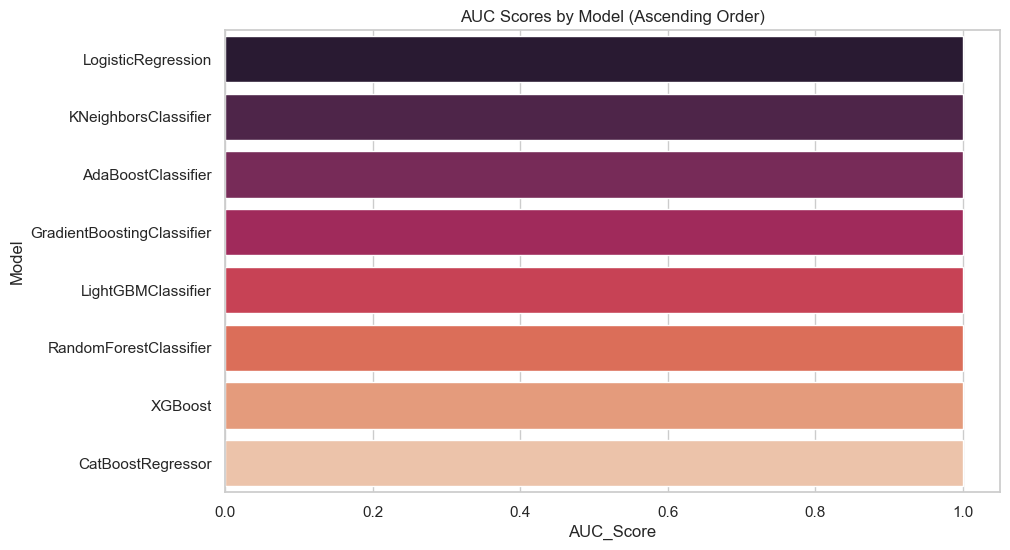

In [146]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x='AUC_score', y='Model', data=results, palette="rocket")
ax.set(xlabel="AUC_Score", ylabel="Model")
plt.title("AUC Scores by Model (Ascending Order)")
plt.show()

#### These scores seem my models are overfitted. Let's try to solve it with cross-validation

#  9- Model Creation with Cross Validation

### 9.1 Dataset Preparation

In [147]:
df_ohe = alternative_ohe(df,90,df.columns)

In [148]:
df_ohe

,poisonous_e,cap-shape_x,cap-shape_f,cap-shape_k,cap-surface_y,cap-surface_s,cap-surface_f,cap-color_n,cap-color_g,cap-color_e,cap-color_y,cap-color_w,bruises_f,odor_n,odor_f,odor_y,odor_s,odor_a,odor_l,gill-attachment_f,gill-spacing_c,gill-size_b,gill-color_b,gill-color_p,gill-color_w,gill-color_n,gill-color_g,gill-color_h,gill-color_u,stalk-shape_t,stalk-root_b,stalk-root_?,stalk-root_e,stalk-surface-above-ring_s,stalk-surface-above-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_k,stalk-surface-below-ring_f,stalk-color-above-ring_w,stalk-color-above-ring_p,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-below-ring_w,stalk-color-below-ring_p,stalk-color-below-ring_g,stalk-color-below-ring_n,veil-color_w,ring-number_o,ring-type_p,ring-type_e,ring-type_l,spore-print-color_w,spore-print-color_n,spore-print-color_k,spore-print-color_h,population_v,population_y,population_s,population_n,habitat_d,habitat_g,habitat_p,habitat_l,habitat_u
0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,1,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8120,1,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
8121,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8122,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [149]:
# variables from feature importance check
ohe_drop.append('poisonous_e')

In [150]:
ohe_drop

['cap-color_g',
 'cap-color_n',
 'gill-color_p',
 'cap-shape_x',
 'stalk-root_b',
 'cap-shape_f',
 'poisonous_e']

In [151]:
X_ohe = df_ohe.drop(ohe_drop,axis=1)
y_ohe = df_ohe['poisonous_e']

In [152]:
X_ohe

,cap-shape_k,cap-surface_y,cap-surface_s,cap-surface_f,cap-color_e,cap-color_y,cap-color_w,bruises_f,odor_n,odor_f,odor_y,odor_s,odor_a,odor_l,gill-attachment_f,gill-spacing_c,gill-size_b,gill-color_b,gill-color_w,gill-color_n,gill-color_g,gill-color_h,gill-color_u,stalk-shape_t,stalk-root_?,stalk-root_e,stalk-surface-above-ring_s,stalk-surface-above-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_k,stalk-surface-below-ring_f,stalk-color-above-ring_w,stalk-color-above-ring_p,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-below-ring_w,stalk-color-below-ring_p,stalk-color-below-ring_g,stalk-color-below-ring_n,veil-color_w,ring-number_o,ring-type_p,ring-type_e,ring-type_l,spore-print-color_w,spore-print-color_n,spore-print-color_k,spore-print-color_h,population_v,population_y,population_s,population_n,habitat_d,habitat_g,habitat_p,habitat_l,habitat_u
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8120,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
8121,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8122,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0


### 9.2 Cross Validation

In [153]:
skf = StratifiedKFold(n_splits=5, random_state=34, shuffle=True)

In [154]:
dataframes=[]
for i, (train_index, test_index) in enumerate(skf.split(X_ohe, y_ohe)):
    train_x = X_ohe.iloc[train_index]
    train_y = y_ohe.iloc[train_index]
    test_x  = X_ohe.iloc[test_index]
    test_y  = y_ohe.iloc[test_index]
    
    model_names = []
    auc_scores = []
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    
    print(f'===================FOLD{i}======================================================================')
    for model_name, model_instance in models.items():
        print(f"-----{model_name}-----")
        
        #Fit and Predict
        model_instance.fit(train_x, train_y)
        y_pred = model_instance.predict(test_x)        
        y_pred_prob = model_instance.predict_proba(test_x)
        
        # Scores 
        auc_score = round(roc_auc_score(test_y, y_pred_prob[:, 1]), 4)    
        accuracy = round(accuracy_score(test_y, y_pred),4)
        precision = precision_score(test_y, y_pred)
        recall = recall_score(test_y, y_pred)
        f1_sc = f1_score(test_y, y_pred)
    
        #Scores append
        model_names.append(model_name)        
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1_sc)
        auc_scores.append(auc_score)
        
    
        #Scores print        
        print("AUC Score:",auc_score)
        print(f'Accuracy: {accuracy}')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print('F1-Score:',f1_sc)
        print('\n')
    dataframes.append(pd.DataFrame({'model':model_names, 'AUC_scores':auc_scores, 'Accuracies':accuracies, 'Precisions':precisions, 'Recalls':recalls,'F1_Scores':f1_scores}).sort_values(by='AUC_scores',ascending=True))
    
    print(f'=============================END OF FOLD{i}========================================================\n\n')

===================FOLD0======================================================================
-----LogisticRegression-----
AUC Score: 1.0
Accuracy: 0.9982
Precision: 0.9964454976303317
Recall: 1.0
F1-Score: 0.998219584569733


-----KNeighborsClassifier-----
AUC Score: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


-----AdaBoostClassifier-----
AUC Score: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


-----GradientBoostingClassifier-----
AUC Score: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


-----LightGBMClassifier-----
[LightGBM] [Info] Number of positive: 3367, number of negative: 3132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 114
[LightGBM] [Info] Number of data points in the train set: 6499, number of used features: 57
[LightGBM]

In [155]:
for i in dataframes:
    print(i,'\n\n','-'*50)

                        model  AUC_scores  Accuracies  Precisions  Recalls  \
0          LogisticRegression         1.0      0.9982    0.996445      1.0   
1        KNeighborsClassifier         1.0      1.0000    1.000000      1.0   
2          AdaBoostClassifier         1.0      1.0000    1.000000      1.0   
3  GradientBoostingClassifier         1.0      1.0000    1.000000      1.0   
4          LightGBMClassifier         1.0      1.0000    1.000000      1.0   
5      RandomForestClassifier         1.0      1.0000    1.000000      1.0   
6                     XGBoost         1.0      1.0000    1.000000      1.0   
7           CatBoostRegressor         1.0      1.0000    1.000000      1.0   

   F1_Scores  
0    0.99822  
1    1.00000  
2    1.00000  
3    1.00000  
4    1.00000  
5    1.00000  
6    1.00000  
7    1.00000   

 --------------------------------------------------
                        model  AUC_scores  Accuracies  Precisions  Recalls  \
0          LogisticRegression 

#### I doubted about overfit so i used cross validation. But models gave same results either with cross validation or not. It seems in this dataset these scores are normal. 